# Predicting Cocoa Tonnes for Ghana

The dataset used in this model was gathered from various sources and merged into a single excel file. The features in this dataset 
include:

year

rainfall

avg_temp

area_harvested

yield

peice

prod_tonne

# Import Packages

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib as mpl

# Read Data

In [105]:
path = "/content/gdrive/My Drive/ghana_cocoa.csv"
# read the datafile
data = pd.read_csv(path, delimiter=',', header=None, skiprows=1, names=['year', 'rainfall', 'avg_temp', 'area_harvested', 'yield', 'price', 'prod_tonnes'])

# Data Cleaning and Exploration

In [106]:
#check first five rows
data.head()

,year,rainfall,avg_temp,area_harvested,yield,price,prod_tonnes
0,1961,1074.81,26.97,1756000,2364,NaN,415200
1,1962,1404.02,26.96,1800000,2378,NaN,428100
2,1963,1610.81,27.28,1820000,2351,NaN,427800
3,1964,1173.96,26.87,1848000,3141,NaN,580500
4,1965,1253.07,26.99,1830000,2272,NaN,415800


In [107]:
#last five rows
data.tail()


,year,rainfall,avg_temp,area_harvested,yield,price,prod_tonnes
49,2010,1273.82,28.10,1600200,3950,3035.0,632037
50,2011,1130.07,27.77,1600300,4374,2109.0,700020
51,2012,1204.82,27.54,1600300,5495,2236.0,879348
52,2013,1070.34,27.73,1600300,5221,2709.0,835466
53,2014,1187.63,27.85,1683765,5100,2910.0,858720


In [108]:
#check descriptive statistics of data
data.describe()

,year,rainfall,avg_temp,area_harvested,yield,price,prod_tonnes
count,54.000000,54.000000,54.000000,5.400000e+01,54.000000,46.000000,54.000000
mean,1987.500000,1175.674074,27.383704,1.305375e+06,3196.314815,1931.065217,421193.240741
std,15.732133,143.917919,0.389316,3.774644e+05,876.807004,803.038934,186846.444705
min,1961.000000,826.350000,26.490000,6.865310e+05,2054.000000,720.000000,166700.000000
25%,1974.250000,1107.750000,27.172500,1.012500e+06,2458.000000,1326.000000,282618.750000
50%,1987.500000,1175.155000,27.410000,1.357265e+06,2916.000000,1724.500000,400150.000000
75%,2000.750000,1225.570000,27.700000,1.600150e+06,3922.000000,2573.250000,461650.000000
max,2014.000000,1709.360000,28.240000,2.000000e+06,5495.000000,3897.000000,879348.000000


In [109]:
#check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            54 non-null     int64  
 1   rainfall        54 non-null     float64
 2   avg_temp        54 non-null     float64
 3   area_harvested  54 non-null     int64  
 4   yield           54 non-null     int64  
 5   price           46 non-null     float64
 6   prod_tonnes     54 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 3.1 KB


In [110]:
#check for missing data
#function to display percentage of missing data
def missing_statistics(df):    
    statitics = pd.DataFrame(df.isnull().sum()).reset_index()
    statitics.columns=['COLUMN NAME',"MISSING VALUES"]
    statitics['TOTAL ROWS'] = df.shape[0]
    statitics['% MISSING'] = round((statitics['MISSING VALUES']/statitics['TOTAL ROWS'])*100,2)
    return statitics

In [111]:
missing_statistics(data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,year,0,54,0.00
1,rainfall,0,54,0.00
2,avg_temp,0,54,0.00
3,area_harvested,0,54,0.00
4,yield,0,54,0.00
5,price,8,54,14.81
6,prod_tonnes,0,54,0.00


In [112]:
#fill missing data in price column with mean
data['price'] = data['price'].transform(lambda x: x.fillna(x.mean()))

In [113]:
#Creating a new column to store classification thresholds, where production tonnes exceeding 500,000 would be 1 and productions tonnes below 500,000 would be 0.
#create new column class
data['class'] =  np.where( data.prod_tonnes > 500000, 1, 0)


# Data Insights and Visualisation 

In [ ]:
import seaborn as sns

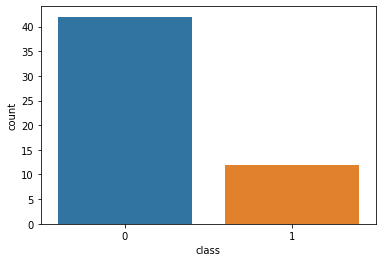

In [114]:
#How many years did production tonnes exceed 500,000 tonnes?
sns.countplot(data=data, x = 'class', label = 'count')
Exceed, Not_Exceed = data['class'].value_counts()

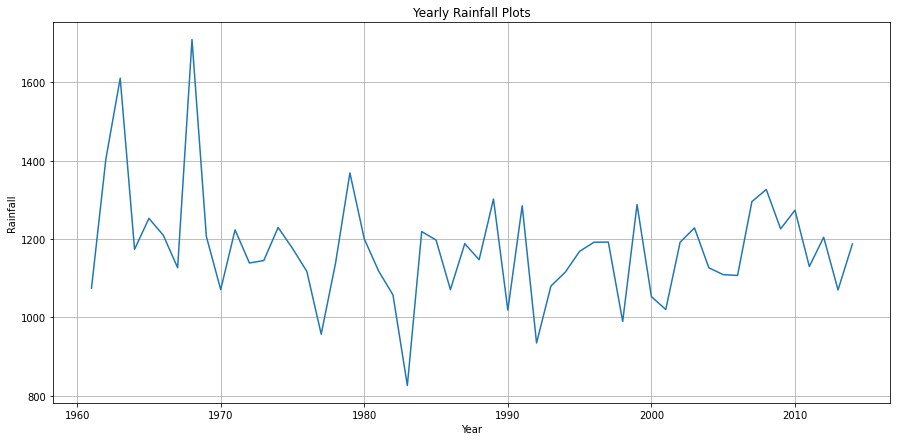

In [115]:
#Yearly rainfall plots
plt.figure(figsize=(15, 7))
plt.plot(data['year'], data['rainfall'])
plt.title('Yearly Rainfall Plots')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.grid(True)
plt.show()

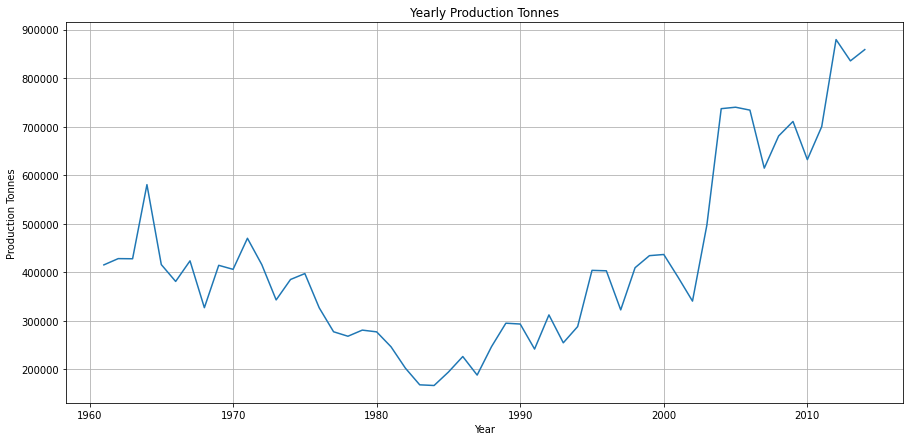

In [117]:
#Yearly production tonnes
plt.figure(figsize=(15, 7))
plt.plot(data['year'], data['prod_tonnes'])
plt.title('Yearly Production Tonnes')
plt.xlabel('Year')
plt.ylabel('Production Tonnes')
plt.grid(True)
plt.show()

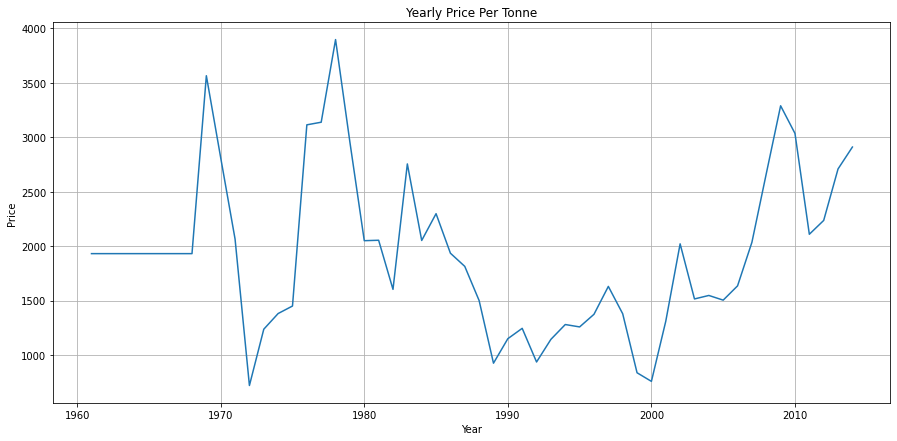

In [118]:
#Yearly Price Per Tonne
plt.figure(figsize=(15, 7))
plt.plot(data['year'], data['price'])
plt.title('Yearly Price Per Tonne')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

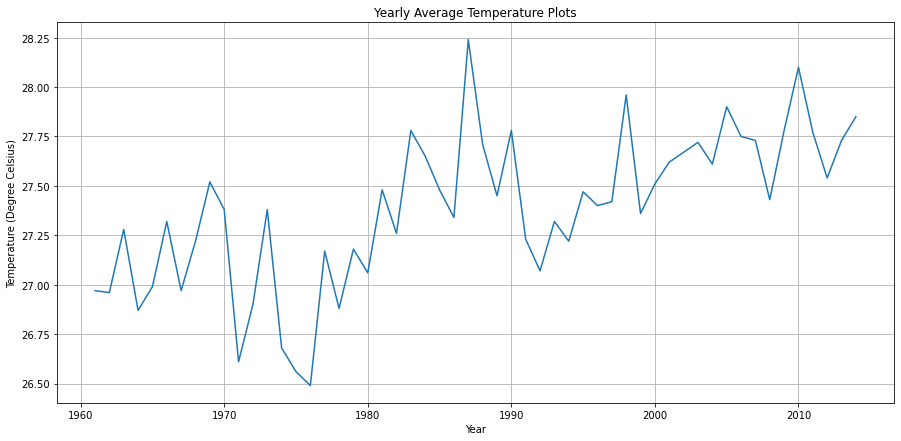

In [119]:
#Yearly temperature plots
plt.figure(figsize=(15, 7))
plt.plot(data['year'], data['avg_temp'])
plt.title('Yearly Average Temperature Plots')
plt.xlabel('Year')
plt.ylabel('Temperature (Degree Celsius)')
plt.grid(True)
plt.show()

# Machine Learning

In [ ]:
data.columns #check columns

Index(['year', 'rainfall', 'avg_temp', 'area_harvested', 'yield', 'price',
       'prod_tonnes', 'class'],
      dtype='object')

In [120]:
#taking the log of the target variable
data["prod_tonnes"] = np.log1p(data["prod_tonnes"]) 

In [121]:
#creating a new dataframes
input_data = data.drop(['year','prod_tonnes'], axis = 1) #input variable to be used in  the model

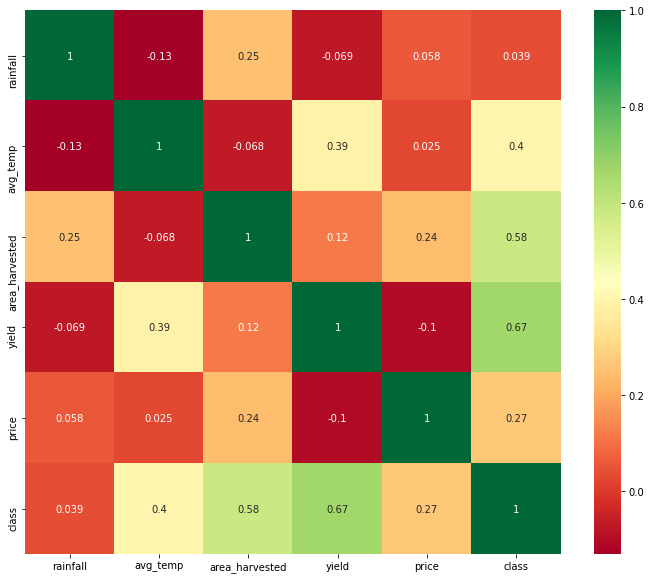

In [123]:
#correlation heatmap
plt.figure(figsize=(12,10))  
p=sns.heatmap(input_data.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
gh = data.drop('year', axis = 1) #create another datafame gh for assessing ditribution plots

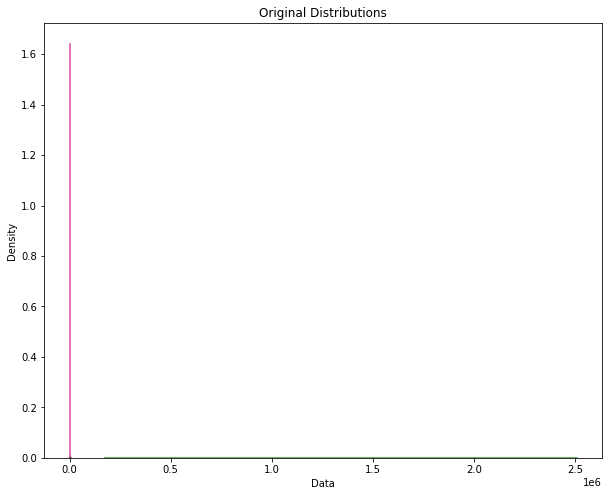

In [ ]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')
ax1.set(xlabel='Data')

sns.kdeplot(gh['rainfall'], ax=ax1)
sns.kdeplot(gh['avg_temp'], ax=ax1)
sns.kdeplot(gh['area_harvested'], ax=ax1)
sns.kdeplot(gh['yield'], ax=ax1)
sns.kdeplot(gh['price'], ax=ax1)
sns.kdeplot(gh['prod_tonnes'], ax=ax1)
sns.kdeplot(gh['class'], ax=ax1);

The Data is clearly skewed to the right, hence applying a MinMax scaler should put features on the same scale.

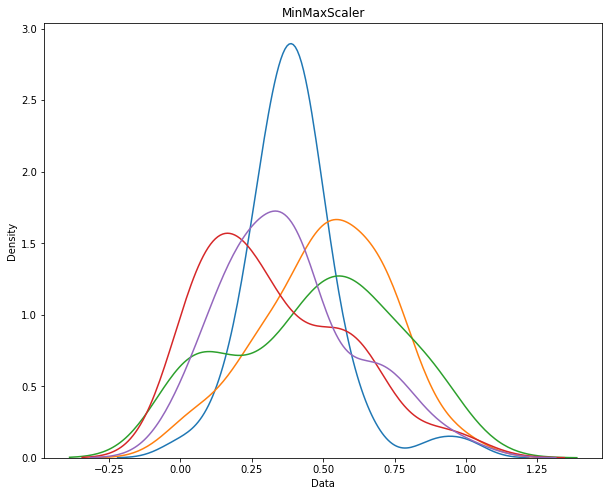

In [ ]:
#Min Max Scaler
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
col_names = list(input_data.columns)
input_data_mm = mm_scaler.fit_transform(input_data)

input_data_mm = pd.DataFrame(input_data_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('MinMaxScaler')
ax1.set(xlabel='Data')

sns.kdeplot(input_data_mm['rainfall'], ax=ax1)
sns.kdeplot(input_data_mm['avg_temp'], ax=ax1)
sns.kdeplot(input_data_mm['area_harvested'], ax=ax1)
sns.kdeplot(input_data_mm['yield'], ax=ax1)
sns.kdeplot(input_data_mm['price'], ax=ax1);

In [ ]:
# Seperating Features and Target variable
from sklearn.model_selection import train_test_split
X = input_data_mm.drop(['class', 'price'], axis = 1) #drop these columns
y = data['prod_tonnes']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25)


In [ ]:
#Using XgBoost
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

[10:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions
predictions = my_model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(predictions, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions, y_test)))
print('Coefficient of Determination:', metrics.r2_score(predictions, y_test))

Mean Absolute Error: 0.033621215487932385
Mean Squared Error: 0.0020287415973549907
Root Mean Squared Error: 0.045041554117891965
Coefficient of Determination: 0.9806270078007322


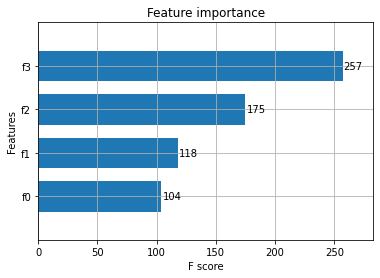

In [ ]:
import xgboost as xgb
xgb.plot_importance(my_model, height=0.7) #identify feature importance

<BarContainer object of 4 artists>

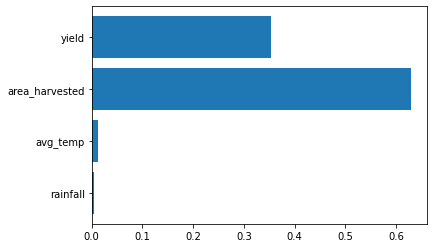

In [ ]:
#view feature importance
plt.barh(X.columns, my_model.feature_importances_)

In [ ]:
#create dataframe to view actual v predicted values
compare = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
compare.head(10)

,Actual,Predicted
0,12.922353,12.837634
1,12.861261,12.854170
2,12.966413,12.937528
3,12.589142,12.590412
4,12.914111,12.904999
5,12.145106,12.201580
6,12.533219,12.538941
7,12.499492,12.423458
8,13.458866,13.521646
9,12.936518,12.934724


In [ ]:
#take the anti-log of both predicted and actual values to get put values on original scale. 
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)
compare1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
compare1.head(10)

,Actual,Predicted
0,434200.0,391017.312500
1,415700.0,414770.875000
2,241796.0,248680.750000
3,858720.0,843716.250000
4,497000.0,539366.562500
5,293355.0,303694.625000
6,406000.0,412420.812500
7,389591.0,390602.875000
8,277200.0,283841.625000
9,246500.0,231460.546875


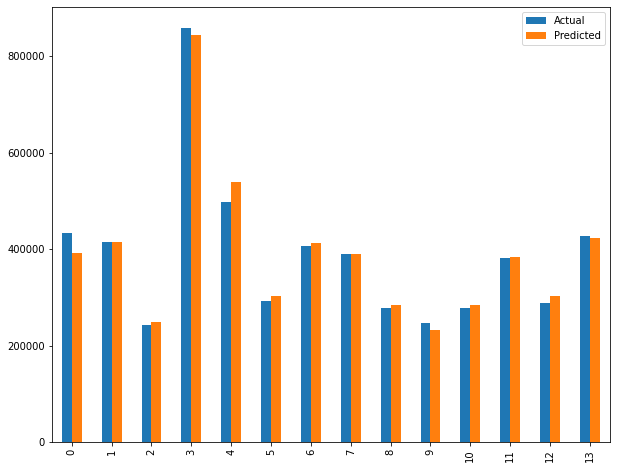

In [ ]:
#visualize predicted v actual to see how well model performed
compare1.plot(kind='bar',figsize=(10,8))